# Multiple Regression Analysis Notebook

This notebook performs multiple regression analysis on fields in a dataset.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the file and clean the data

In [18]:
# Replace 'your_dataset.csv' with the path to your dataset
csv_file = 'datasets/Courses.csv'
data = pd.read_csv(csv_file)

selected_fields = ['grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'incomplete_flag']
selected_data = data[selected_fields]
ft_data = selected_data.fillna(0)
ft_data = ft_data.apply(pd.to_numeric, errors='coerce')
ft_data = ft_data[ft_data['grade'] > 0]
ft_data = ft_data[selected_data['incomplete_flag'] != 1]
ft_data.head()

C:\Users\phili\AppData\Local\Temp\ipykernel_9340\2071882289.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ft_data = ft_data[selected_data['incomplete_flag'] != 1]


,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag
12,0.07,175.0,9.0,0.0,7.0,0,0.0
29,0.05,285.0,8.0,0.0,4.0,0,0.0
90,0.13,2796.0,23.0,891.0,6.0,0,0.0
108,0.35,1068.0,14.0,103.0,3.0,0,0.0
118,1.00,439.0,47.0,0.0,11.0,0,0.0


## Step 2: Specify variables and perform Cross-Validation

In [19]:
# Select features and target (modify column names as needed)
features = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']  # Replace with actual feature column names
target = 'grade'  # Replace with the target variable name

X = ft_data[features]
y = ft_data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso with Cross-Validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha:.5f}")

Best alpha: 0.00010


## Step 3: Run Lasso Regression

In [20]:
# Train final Lasso model with best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R-squared (R²): {r2:.5f}")

# Coefficients
coef_df = pd.DataFrame({'Feature': ['Intercept'] + features, 'Coefficient': [lasso.intercept_] + list(lasso.coef_)})
print("\nLasso Coefficients:")
print(coef_df)

Mean Squared Error (MSE): 0.04826
R-squared (R²): 0.59313

Lasso Coefficients:
        Feature  Coefficient
0     Intercept     0.267484
1       nevents     0.046051
2     ndays_act     0.106485
3   nplay_video    -0.015826
4     nchapters     0.158059
5  nforum_posts    -0.011781


## Step 4: Plot feature importance

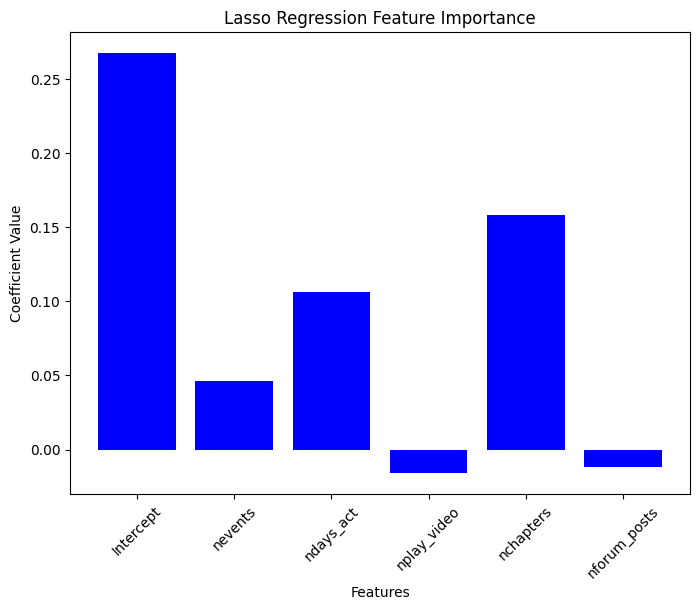

In [21]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Feature Importance")
plt.xticks(rotation=45)
plt.show()